# Подготовка окружения и загрузка данных

## Импорт библиотек

In [1]:
#импорт библиотек

#основные
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import shutup

#математика
import math
from math import factorial
from math import sqrt

#статистика
from scipy import stats
import random

#графики
import matplotlib.pyplot as plt
from sklearn import tree
import ipywidgets
from scipy.stats import norm

#машинное обучение - общее
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

#работа с текстом
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.snowball import SnowballStemmer
#from nltk.stem import SnowballStemmer, LancasterStemmer,  PorterStemmer,WordNetLemmatizer
#from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')

#машинное обучение - классификация
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import miceforest as mf
from catboost import CatBoostClassifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_auc_score

#машинное обучение - регрессия
from sklearn.ensemble import RandomForestRegressor

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Филипповы\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Филипповы\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Филипповы\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Филипповы\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Подготовка пользовательских функций

In [2]:
def explain_dataset(dataset, hist_on):
    dataset.info()
    print()
    print('количество полных дубликатов в таблице =', dataset.duplicated().sum())
    pd.set_option('display.max_columns', None)
    display(dataset.describe().T)
    display(dataset.head(10))
    if hist_on: dataset.hist(figsize=(15, 20), bins=30);

## Чтение файлов с данными

<b>Данные</b>
* train.csv - информация (~20000) музыкальных треках, которые будут использоваться в качестве обучающих данных.
* test.csv - информация (~5000) музыкальных треках, которые будут использоваться в качестве тестовых данных. Задача - предсказать значение 'music_genre' для каждого трека из этого датасета.

In [3]:
#читаем файл с обсучающими данными
df_init = pd.read_csv('kaggle_music_genre_train.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

,count,mean,std,min,25%,50%,75%,max
instance_id,20394.0,55973.846916,20695.792545,20011.00000,38157.25000,56030.000000,73912.750000,91758.000
acousticness,20394.0,0.274783,0.321643,0.00000,0.01520,0.120000,0.470000,0.996
danceability,20394.0,0.561983,0.171898,0.06000,0.45100,0.570000,0.683000,0.978
duration_ms,20394.0,220375.425272,126728.326142,-1.00000,177517.00000,219533.000000,266000.000000,4497994.000
energy,20394.0,0.625276,0.251238,0.00101,0.47000,0.666000,0.830000,0.999
instrumentalness,20394.0,0.159989,0.306503,0.00000,0.00000,0.000144,0.084475,0.996
liveness,20394.0,0.198540,0.166742,0.01360,0.09730,0.130000,0.253000,1.000
loudness,20394.0,-8.552998,5.499917,-44.40600,-10.25575,-7.052000,-5.054000,3.744
speechiness,20394.0,0.091352,0.097735,0.02230,0.03560,0.049050,0.095575,0.942
tempo,19952.0,120.942522,30.427590,34.76500,95.92175,120.012500,141.966250,220.041


,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.0,Highwayman,0.480000,0.670,182653.0,0.351,0.017600,D,0.1150,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
1,26091.0,Toes Across The Floor,0.243000,0.452,187133.0,0.670,0.000051,A,0.1080,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
2,87888.0,First Person on Earth,0.228000,0.454,173448.0,0.804,0.000000,E,0.1810,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
3,77021.0,No Te Veo - Digital Single,0.055800,0.847,255987.0,0.873,0.000003,G#,0.3250,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
4,20852.0,Chasing Shadows,0.227000,0.742,195333.0,0.575,0.000002,C,0.1760,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative
5,43934.0,Eskimo Blue Day - Remastered,0.102000,0.308,392893.0,0.590,0.371000,D,0.1120,-11.703,Major,0.0345,145.758,4-Apr,0.496,Blues
6,23450.0,Living On My Own,0.000234,0.655,218267.0,0.687,0.000024,A,0.0869,-11.789,Minor,0.0337,123.923,4-Apr,0.411,Rock
7,28380.0,Para Machuchar Meu Coracao,0.953000,0.591,309813.0,0.109,0.357000,D#,0.0921,-17.975,Major,0.0449,130.597,4-Apr,0.395,Jazz
8,70054.0,In the Mood,0.195000,0.647,283373.0,0.595,0.000118,A#,0.1290,-8.416,Minor,0.0336,73.478,4-Apr,0.546,Jazz
9,74815.0,20.000 Volts,0.032300,0.537,237000.0,0.962,0.193000,C,0.1580,-2.749,Major,0.1210,160.031,4-Apr,0.430,Electronic


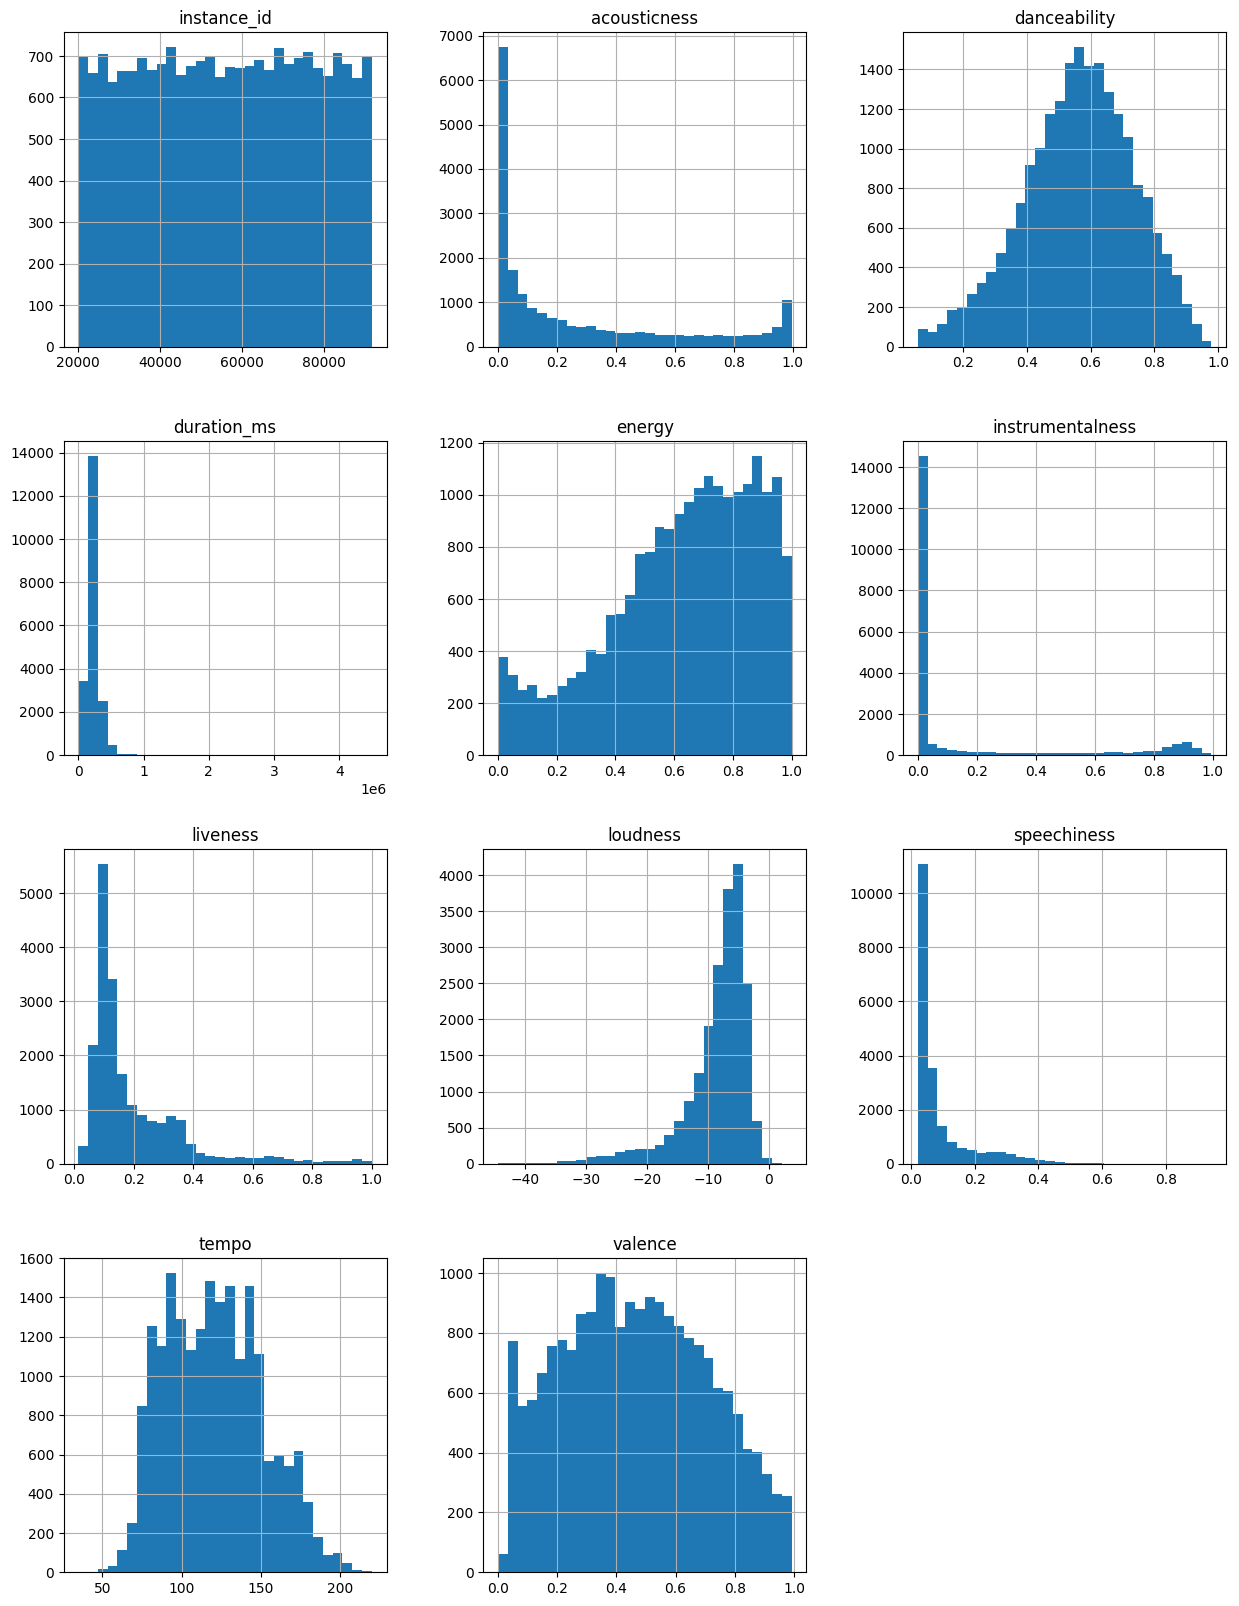

In [4]:
explain_dataset(df_init,True)

In [5]:
df_init_test = pd.read_csv('kaggle_music_genre_test.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       5099 non-null   int64  
 1   track_name        5099 non-null   object 
 2   acousticness      5099 non-null   float64
 3   danceability      5099 non-null   float64
 4   duration_ms       5099 non-null   float64
 5   energy            5099 non-null   float64
 6   instrumentalness  5099 non-null   float64
 7   key               4941 non-null   object 
 8   liveness          5099 non-null   float64
 9   loudness          5099 non-null   float64
 10  mode              4950 non-null   object 
 11  speechiness       5099 non-null   float64
 12  tempo             4978 non-null   float64
 13  obtained_date     5099 non-null   object 
 14  valence           5099 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 597.7+ KB

количество полных дубликатов

,count,mean,std,min,25%,50%,75%,max
instance_id,5099.0,55643.871347,20762.384803,20012.000000,37571.00000,55246.000000,73702.00000,91709.000
acousticness,5099.0,0.276324,0.322657,0.000002,0.01660,0.120000,0.46000,0.996
danceability,5099.0,0.561888,0.170502,0.059600,0.45100,0.568000,0.68100,0.977
duration_ms,5099.0,217397.407727,115637.408282,-1.000000,173733.50000,217500.000000,264247.00000,1360027.000
energy,5099.0,0.622030,0.251829,0.001540,0.46500,0.660000,0.82600,0.999
instrumentalness,5099.0,0.165198,0.311940,0.000000,0.00000,0.000157,0.09275,0.994
liveness,5099.0,0.197924,0.166241,0.020400,0.09695,0.129000,0.24800,0.990
loudness,5099.0,-8.630186,5.619766,-46.122000,-10.23100,-7.135000,-5.12700,1.949
speechiness,5099.0,0.092718,0.100130,0.022600,0.03570,0.048700,0.09655,0.918
tempo,4978.0,121.246463,29.875950,37.114000,96.07025,120.053500,141.93425,216.029


,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
0,48564,Low Class Conspiracy,0.301000,0.757,146213.0,0.679,0.000000,A#,0.3030,-7.136,Minor,0.3560,90.361,4-Apr,0.895
1,72394,The Hunter,0.538000,0.256,240360.0,0.523,0.008320,G#,0.0849,-5.175,Major,0.0294,78.385,4-Apr,0.318
2,88081,Hate Me Now,0.005830,0.678,284000.0,0.770,0.000000,A,0.1090,-4.399,Minor,0.2220,90.000,4-Apr,0.412
3,78331,Somebody Ain't You,0.020300,0.592,177354.0,0.749,0.000000,B,0.1220,-4.604,Major,0.0483,160.046,4-Apr,0.614
4,72636,Sour Mango,0.000335,0.421,-1.0,0.447,0.014800,D,0.0374,-8.833,Major,0.2020,73.830,4-Apr,0.121
5,74228,If You're Going to the City,0.919000,0.516,227267.0,0.192,0.000026,A#,0.1840,-18.983,Minor,0.0650,73.241,4-Apr,0.603
6,39106,21 Questions,0.388000,0.547,224427.0,0.807,0.000091,F#,0.0436,-4.083,Minor,0.3600,79.823,3-Apr,0.919
7,78829,Husbands And Wives,0.653000,0.591,190032.0,0.388,0.000214,F,0.1670,-8.069,Major,0.0267,105.977,3-Apr,0.122
8,91469,Slow Me Down,0.214000,0.597,196160.0,0.602,0.000320,G,0.3130,-4.990,Major,0.0292,91.999,4-Apr,0.262
9,54558,Me Pegó la Gana,0.640000,0.578,168533.0,0.514,0.000000,G,0.1440,-5.990,Major,0.0401,66.342,3-Apr,0.857


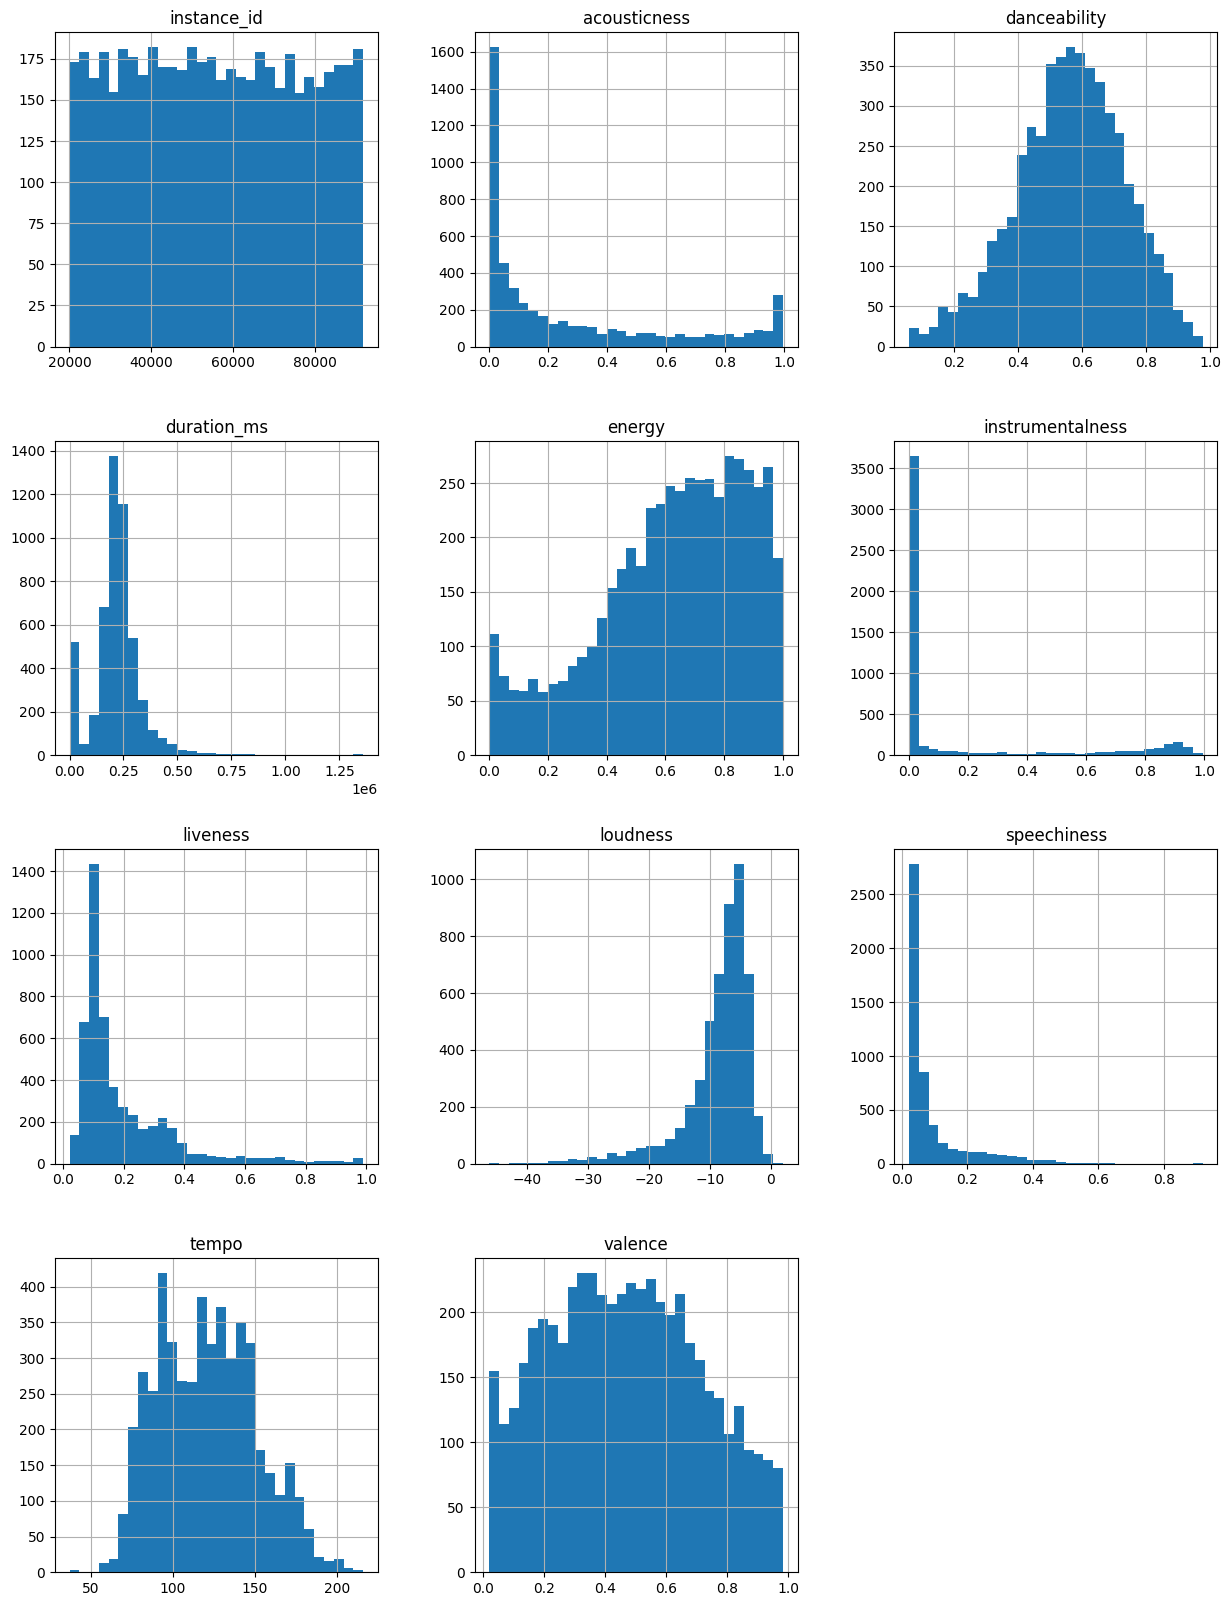

In [6]:
explain_dataset(df_init_test,True)

In [7]:
#добавим пустой столбец с целевым признаком
df_init_test['music_genre'] = ''

# Исследовательский анализ данных
Проведем анализ данных в каждом из признаков и подготовим их для дальнейшего использования при обсучении модели 

## Общее описание признаков в датасете

* instance_id - уникальный идентификатор трека
* track_name - название трека
* acousticness - акустичность
* danceability - танцевальность
* duration_ms -продолжительность в милисекундах
* energy - энергичность
* instrumentalness - инструментальность
* key - базовый ключ (нота) произведения
* liveness - привлекательность
* loudness - громкость
* mode - указывает на модальность (мажорную или минорную) трека
* speechiness - выразительность
* tempo - темп
* obtained_date - дата загрузки в сервис
* valence - привлекательность произведения для пользователей сервиса
* music_genre - музыкальный жанр

## Анализ и обработка признаков

Первичный анализ показал несколько признаков, которые, скорее всего, не оказывают значимого влияния на ключевой признак. Это:
* instance_id - уникальный идентификатор трека
* track_name - название трека
* obtained_date - дата загрузки в сервис

In [8]:
#сделаем копию исходного датасета, чтобы далее можно было вернутся к ней
df = df_init.copy(deep = True)
df_test = df_init_test.copy(deep = True)

In [9]:
#выделим в отдельный массив признаки, не значимые для обучения
features_to_drop = ['instance_id']
features_to_drop.append('track_name')
features_to_drop.append('obtained_date')

Так-же первичный анализ показал данные, в которых есть выбросы, которые стоит обработать позднее:
* duration_ms -продолжительность в милисекундах
* liveness - привлекательность
* loudness - громкость
* speechiness - выразительность

Кроме того, выявлены признакие в которых есть пропуски либо аномалии, аналогичные пропускам:
* duration_ms -продолжительность в милисекундах
* key - базовый ключ (нота) произведения
* mode - указывает на модальность (мажорную или минорную) трека
* tempo - темп

И, наконец, выявлены признаки, с которыми, на первый взгляд, ничего делать не нужно:
* acousticness - акустичность
* danceability - танцевальность
* energy - энергичность
* instrumentalness - инструментальность
* valence - привлекательность произведения для пользователей сервиса

## Изучение корреляции признаков

In [10]:
#удалим лишние признаки и преобразуем категориальные признаки в числовые
df_study = df.drop(['track_name', 'obtained_date','instance_id'], axis=1)
ord_enc = OrdinalEncoder()
df_study[['key','mode', 'music_genre']] = ord_enc.fit_transform(df_study[['key','mode', 'music_genre']])
df_study.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,0.4800,0.670,182653.0,0.351,0.017600,5.0,0.115,-16.842,0.0,0.0463,101.384,0.450,4.0
1,0.2430,0.452,187133.0,0.670,0.000051,0.0,0.108,-8.392,1.0,0.0352,113.071,0.539,9.0
2,0.2280,0.454,173448.0,0.804,0.000000,7.0,0.181,-5.225,1.0,0.3710,80.980,0.344,0.0
3,0.0558,0.847,255987.0,0.873,0.000003,11.0,0.325,-4.805,1.0,0.0804,116.007,0.966,6.0
4,0.2270,0.742,195333.0,0.575,0.000002,3.0,0.176,-5.550,0.0,0.0487,76.494,0.583,0.0


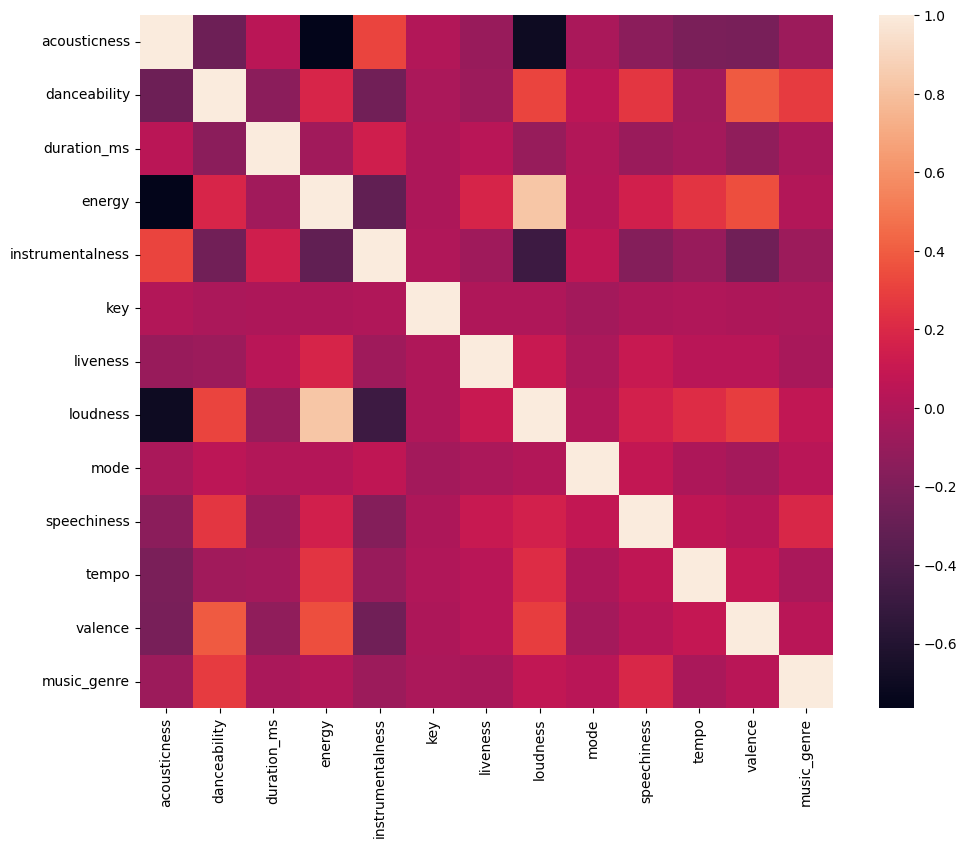

In [11]:
#построим хитмэп корреляции
df_study_corr = df_study.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df_study_corr, cbar=True, square=True);

# Разработка базовой ML-модели

## Подготовка признаков

### Кодирование категориальных признаков методом OHE

In [12]:
#добавим целевой признак в массив отбрасываемых столбцов
features_to_drop.append('music_genre')
features_to_drop

['instance_id', 'track_name', 'obtained_date', 'music_genre']

In [13]:
#выделим целевой признак в отдельный датафрейм и сгруппируем признаки для предсказания в другом датафрейме
features_train_raw = df.drop(features_to_drop, axis=1)
target_train = df['music_genre']

#проверим формат получившихся датасетов
print(f'Датасет features: {features_train_raw.shape}')
print(f'Датасет target: {target_train.shape}')

Датасет features: (20394, 12)
Датасет target: (20394,)


In [14]:
#изучим получившийся датасет features
features_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      20394 non-null  float64
 1   danceability      20394 non-null  float64
 2   duration_ms       20394 non-null  float64
 3   energy            20394 non-null  float64
 4   instrumentalness  20394 non-null  float64
 5   key               19659 non-null  object 
 6   liveness          20394 non-null  float64
 7   loudness          20394 non-null  float64
 8   mode              19888 non-null  object 
 9   speechiness       20394 non-null  float64
 10  tempo             19952 non-null  float64
 11  valence           20394 non-null  float64
dtypes: float64(10), object(2)
memory usage: 1.9+ MB


В датасете встречаются категориальные признаки, которые могут быть важны для обучения, проведем прямое кодирований, чтобы адаптировать их для ML-модели

In [15]:
#проведеm прямое кодирование признаков для обучающего датасета
features_to_encode = ['key','mode']

OHEncoder = OneHotEncoder()

transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'), features_to_encode),
    remainder='passthrough')

#проведем обучение и кодирование для датасета features_train
features_train_ohe = transformer.fit_transform(features_train_raw)
features_train = pd.DataFrame(
    features_train_ohe, 
    columns=transformer.get_feature_names_out()
)

#проверим формат получившихся датасетов
print(f'Датасет features_train: {features_train.shape}')
print(f'Датасет target: {target_train.shape}')

Датасет features_train: (20394, 24)
Датасет target: (20394,)


In [16]:
#аналогично подготовыи и тестовые данные
features_test_noohe = df_test.drop(features_to_drop, axis=1)
target_test = df_test['music_genre']


features_ohe_test_raw = transformer.transform(features_test_noohe)
features_test = pd.DataFrame(
    features_ohe_test_raw, 
    columns=transformer.get_feature_names_out()
)

In [17]:
#поскольку после применения OneHotEncoder в датасетах features слетели индексы - сбросим их и для target
target_train = target_train.reset_index(drop=True)
target_test = target_test.reset_index(drop=True)

In [18]:
#выведем информацию о количестве записей в получившихся датасетах, чтобы проверить корректность разделения
print(f'Датасет features_train: {features_train.shape[0]}')
print(f'Датасет target_train: {target_train.shape[0]}')
print()
print(f'Датасет features_test: {features_test.shape[0]}')
print(f'Датасет target_test: {target_test.shape[0]}')

Датасет features_train: 20394
Датасет target_train: 20394

Датасет features_test: 5099
Датасет target_test: 5099


### Масштабирование числовых признаков
Поскольку признаки в выборках находятся в разном масштабе - для повышения качества обучения их нужно привести к единому. Используем масштабирование путем нормализации значений всех признаков в диапазоне от 0 до 1, поскольку дамми-признаки после кодирования категориальных признаков - имеют значения либо 0 либо 1 и будут в одном мас

In [19]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   onehotencoder__key_A#        20394 non-null  float64
 1   onehotencoder__key_B         20394 non-null  float64
 2   onehotencoder__key_C         20394 non-null  float64
 3   onehotencoder__key_C#        20394 non-null  float64
 4   onehotencoder__key_D         20394 non-null  float64
 5   onehotencoder__key_D#        20394 non-null  float64
 6   onehotencoder__key_E         20394 non-null  float64
 7   onehotencoder__key_F         20394 non-null  float64
 8   onehotencoder__key_F#        20394 non-null  float64
 9   onehotencoder__key_G         20394 non-null  float64
 10  onehotencoder__key_G#        20394 non-null  float64
 11  onehotencoder__key_nan       20394 non-null  float64
 12  onehotencoder__mode_Minor    20394 non-null  float64
 13  onehotencoder__m

In [20]:
#создадим массив столбцов, которые нужно масшабировать
pd.options.mode.chained_assignment = None
numeric = ['remainder__acousticness', 'remainder__danceability', 'remainder__duration_ms', 'remainder__energy', 'remainder__instrumentalness',
           'remainder__liveness', 'remainder__loudness', 'remainder__speechiness', 'remainder__tempo', 'remainder__valence']

In [21]:
#рассмотрим диапазон значений выбраных признаков
features_train[numeric].describe()

,remainder__acousticness,remainder__danceability,remainder__duration_ms,remainder__energy,remainder__instrumentalness,remainder__liveness,remainder__loudness,remainder__speechiness,remainder__tempo,remainder__valence
count,20394.000000,20394.000000,2.039400e+04,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,19952.000000,20394.000000
mean,0.274783,0.561983,2.203754e+05,0.625276,0.159989,0.198540,-8.552998,0.091352,120.942522,0.464588
std,0.321643,0.171898,1.267283e+05,0.251238,0.306503,0.166742,5.499917,0.097735,30.427590,0.243387
min,0.000000,0.060000,-1.000000e+00,0.001010,0.000000,0.013600,-44.406000,0.022300,34.765000,0.000000
25%,0.015200,0.451000,1.775170e+05,0.470000,0.000000,0.097300,-10.255750,0.035600,95.921750,0.272000
50%,0.120000,0.570000,2.195330e+05,0.666000,0.000144,0.130000,-7.052000,0.049050,120.012500,0.457000
75%,0.470000,0.683000,2.660000e+05,0.830000,0.084475,0.253000,-5.054000,0.095575,141.966250,0.653000
max,0.996000,0.978000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.041000,0.992000


In [22]:
#масштабируем данные
scaler1 = MinMaxScaler(feature_range=(0, 1))
scaler1.fit(features_train[numeric])
features_train[numeric] = scaler1.transform(features_train[numeric])
features_test[numeric] = scaler1.transform(features_test[numeric])

In [23]:
#повторно рассмотрим диапазон значений выбраных признаков, чтобы проверить масштабирование
features_train[numeric].describe()

,remainder__acousticness,remainder__danceability,remainder__duration_ms,remainder__energy,remainder__instrumentalness,remainder__liveness,remainder__loudness,remainder__speechiness,remainder__tempo,remainder__valence
count,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,19952.000000,20394.000000
mean,0.275887,0.546822,0.048994,0.625523,0.160631,0.187490,0.744611,0.075081,0.465131,0.468334
std,0.322935,0.187252,0.028174,0.251744,0.307734,0.169041,0.114225,0.106269,0.164228,0.245350
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.015261,0.425926,0.039466,0.469935,0.000000,0.084854,0.709247,0.014461,0.330085,0.274194
50%,0.120482,0.555556,0.048807,0.666329,0.000145,0.118005,0.775784,0.029086,0.460111,0.460685
75%,0.471888,0.678649,0.059138,0.830660,0.084814,0.242701,0.817279,0.079673,0.578603,0.658266
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Обучение моделей

### Подбор гиперпараметров для базовой модели - решающее дерево

In [24]:
#зададим модель решающего дерева с балансировкой классов через взвешивание
clf = tree.DecisionTreeClassifier(random_state=12345, class_weight='balanced')

#зададим диапазон гиперпараметров для перебора
parameters = {"max_depth": range(10,25),
              "min_samples_leaf": range(10,20),
              "random_state":[12345]}

#зададим метод оценки модели
scorer = make_scorer(fbeta_score, average='macro', beta=0.5)

#проведем перебор гиперпараметров модели с кросс-валидацией из 3хблоков
grid_obj = GridSearchCV(estimator=clf,param_grid=parameters,scoring=scorer,cv=3,n_jobs=-1)
grid_fit =grid_obj.fit(features_train,target_train)
best_clf = grid_fit.best_estimator_

print(f'Лучший fbeta_score {grid_fit.best_score_:0.06} для решающего дерева: max_depth = {grid_fit.best_params_["max_depth"]}, min_samples_leaf = {grid_fit.best_params_["min_samples_leaf"]}')
best_clf

# Базовое заполнение пропусков и проверка базовой ML-модели

## Заполнение пропусков в обучающих данных
методом медианных значений\наиболее частой категорией в группировке по жанру

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

- Duration_ms - продолжительность в милисекундах

In [26]:
#проверим минимальное значение признака
df['duration_ms'].min()

-1.0

In [27]:
#заполним значения признака с -1 медианой для данного жанра
df['duration_ms'] = df['duration_ms'].replace(-1,np.NaN)
df['duration_ms'] = df.groupby('music_genre',)['duration_ms'].transform(lambda x: x.fillna(x.median()))

* key - базовый ключ (нота) произведения

In [28]:
#посчитаем количество пропусков
df['key'].isnull().sum()

735

In [29]:
#заполним пропуски наиболее частым значением
df['key'] = df.groupby('music_genre')['key'].transform(lambda x: x.fillna(x.value_counts().head(1).index[0]))

In [30]:
#посчитаем количество пропусков
df['key'].isnull().sum()

0

* mode - указывает на модальность (мажорную или минорную) трека

In [31]:
#посчитаем количество пропусков
df['mode'].isnull().sum()

506

In [32]:
#заполним пропуски наиболее частым значением
df['mode'] = df.groupby('music_genre')['mode'].transform(lambda x: x.fillna(x.value_counts().head(1).index[0]))

In [33]:
#посчитаем количество пропусков
df['mode'].isnull().sum()

0

* tempo - темп

In [34]:
#посчитаем количество пропусков
df['tempo'].isnull().sum()

442

In [35]:
#заполним пропуски наиболее частым значением
df['tempo'] = df.groupby('music_genre')['tempo'].transform(lambda x: x.fillna(x.mean()))

In [36]:
#посчитаем количество пропусков
df['tempo'].isnull().sum()

0

In [37]:
#проверим датасет после заполнения пропусков
df.reset_index(drop=True, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               20394 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              20394 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             20394 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

## Заполнение пропусков в тестовых данных
Поскольку для заполнения пропусков в обучающих данных, мы использовали средние значения для известного жанра - в тестовых данных этот подход применить невозможно. Для заполнения значений - используем средние либо случайные значений, либо комбинации методов

In [38]:
#заполним пропуски в столбце key случайным значениями
def get_rand_key(sample_df):
    rand_key = sample_df['key'].unique()
    random_index = random.randint(0, len(rand_key) - 1)
    return rand_key[random_index]

df_test['key'] = df_test['key'].transform(lambda x: x.fillna(get_rand_key(df_test)))

In [39]:
#заполним пропуски в столбце mode типичными значениями для данной группы по key
df_test['mode'] = df_test.groupby('key')['mode'].transform(lambda x: x.fillna(x.value_counts().head(1).index[0]))

In [40]:
#заполним пропуски в столбце tempo медианой для данной группы по key и mode
df_test['tempo'] = df_test.groupby(['key', 'mode'])['tempo'].transform(lambda x: x.fillna(x.mean()))

In [41]:
#заполним значения признака с -1 медианой для данного группы по key и mode
df_test['duration_ms'] = df_test['duration_ms'].replace(-1,np.NaN)
df_test['duration_ms'] = df_test.groupby(['key', 'mode'])['duration_ms'].transform(lambda x: x.fillna(x.median()))

In [42]:
df_test.reset_index(drop=True, inplace= True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       5099 non-null   int64  
 1   track_name        5099 non-null   object 
 2   acousticness      5099 non-null   float64
 3   danceability      5099 non-null   float64
 4   duration_ms       5099 non-null   float64
 5   energy            5099 non-null   float64
 6   instrumentalness  5099 non-null   float64
 7   key               5099 non-null   object 
 8   liveness          5099 non-null   float64
 9   loudness          5099 non-null   float64
 10  mode              5099 non-null   object 
 11  speechiness       5099 non-null   float64
 12  tempo             5099 non-null   float64
 13  obtained_date     5099 non-null   object 
 14  valence           5099 non-null   float64
 15  music_genre       5099 non-null   object 
dtypes: float64(10), int64(1), object(5)
memory

## Повторно - Подготовка признаков

### Кодирование категориальных признаков методом OHE

In [43]:
#выделим целевой признак в отдельный датафрейм и сгруппируем признаки для предсказания в другом датафрейме
features_train_raw = df.drop(features_to_drop, axis=1)
target_train = df['music_genre']

#проведеm прямое кодирование признаков для обучающего датасета
features_to_encode = ['key','mode']

OHEncoder = OneHotEncoder()

transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'), features_to_encode),
    remainder='passthrough')

#проведем обучение и кодирование для датасета features_train
features_train_ohe = transformer.fit_transform(features_train_raw)
features_train = pd.DataFrame(
    features_train_ohe, 
    columns=transformer.get_feature_names_out()
)

In [44]:
#аналогично подготовыи и тестовые данные
features_test_noohe = df_test.drop(features_to_drop, axis=1)
target_test = df_test['music_genre']


features_ohe_test_raw = transformer.transform(features_test_noohe)
features_test = pd.DataFrame(
    features_ohe_test_raw, 
    columns=transformer.get_feature_names_out()
)

In [45]:
#поскольку после применения OneHotEncoder в датасетах features сбросились индексы - сбросим их и для target
target_train = target_train.reset_index(drop=True)
target_test = target_test.reset_index(drop=True)

### Масштабирование числовых признаков
Поскольку признаки в выборках находятся в разном масштабе - для повышения качества обучения их нужно привести к единому. Используем масштабирование путем нормализации значений всех признаков в диапазоне от 0 до 1, поскольку дамми-признаки после кодирования категориальных признаков - имеют значения либо 0 либо 1 и будут в одном масштабе

In [46]:
#создадим массив столбцов, которые нужно масшабировать
pd.options.mode.chained_assignment = None
numeric = ['remainder__acousticness', 'remainder__danceability', 'remainder__duration_ms', 'remainder__energy', 'remainder__instrumentalness',
           'remainder__liveness', 'remainder__loudness', 'remainder__speechiness', 'remainder__tempo', 'remainder__valence']

In [47]:
#масштабируем данные
scaler1 = MinMaxScaler(feature_range=(0, 1))
scaler1.fit(features_train[numeric])
features_train[numeric] = scaler1.transform(features_train[numeric])
features_test[numeric] = scaler1.transform(features_test[numeric])

## Обучение моделей

### Подбор гиперпараметров для базовой модели - решающее дерево

In [48]:
#зададим модель решающего дерева с балансировкой классов через взвешивание
clf = tree.DecisionTreeClassifier(random_state=12345, class_weight='balanced')

#зададим диапазон гиперпараметров для перебора
parameters = {"max_depth": range(10,25),
              "min_samples_leaf": range(10,20),
              "random_state":[12345]}

#зададим метод оценки модели
scorer = make_scorer(fbeta_score, average='macro', beta=0.5)

#проведем перебор гиперпараметров модели с кросс-валидацией из 3хблоков
grid_obj = GridSearchCV(estimator=clf,param_grid=parameters,scoring=scorer,cv=3,n_jobs=-1)
grid_fit =grid_obj.fit(features_train,target_train)
best_clf = grid_fit.best_estimator_

print(f'Лучший fbeta_score {grid_fit.best_score_:0.06} для решающего дерева: max_depth = {grid_fit.best_params_["max_depth"]}, min_samples_leaf = {grid_fit.best_params_["min_samples_leaf"]}')
best_clf

### Подбор гиперпараметров для модели градиентного бустинга

In [49]:
clf = GradientBoostingClassifier(random_state=12345)

parameters = {
    "n_estimators": [200, 250, 300],
    "learning_rate": [0.05],
    "min_samples_leaf": range(7,11),
    "max_depth": [5,7],
    "max_features":["log2"],
    "criterion": ["friedman_mse"],
    "random_state":[12345]
    }

#scorer = make_scorer(fbeta_score, average='macro', beta=0.5)

grid_obj = GridSearchCV(estimator=clf,param_grid=parameters,scoring=scorer,cv=3,n_jobs=-1)
grid_fit =grid_obj.fit(features_train,target_train)
best_clf = grid_fit.best_estimator_

print(f'Лучший fbeta_score {grid_fit.best_score_:0.06} для градиентного бустинга')
best_clf

# Инжиниринг признаков и бустинг через CatBoost

## Преобразование названия трека

In [82]:
df = df_init.copy(deep=True)
df_test = df_init_test.copy(deep=True)

In [83]:
#удаляем все кроме слов на английском и пробелов
def clean_str(text):
    text = re.sub("[^A-Za-z0-9 ]", "", text)
    text = ' '.join(map(str, word_tokenize(text)))
    return text

df['track_name_cleaned'] = df['track_name'].apply(clean_str)
df_test['track_name_cleaned'] = df_test['track_name'].apply(clean_str)

In [84]:
df['track_name_cleaned'].head(10)

0                    Highwayman
1         Toes Across The Floor
2         First Person on Earth
3      No Te Veo Digital Single
4               Chasing Shadows
5    Eskimo Blue Day Remastered
6              Living On My Own
7    Para Machuchar Meu Coracao
8                   In the Mood
9                   20000 Volts
Name: track_name_cleaned, dtype: object

In [85]:
df_test['track_name_cleaned'].head(10)

0          Low Class Conspiracy
1                    The Hunter
2                   Hate Me Now
3             Somebody Aint You
4                    Sour Mango
5    If Youre Going to the City
6                  21 Questions
7            Husbands And Wives
8                  Slow Me Down
9                Me Peg la Gana
Name: track_name_cleaned, dtype: object

In [86]:
def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    text = [word for word in text.split() if word not in stop]
    text = ' '.join(x for x in text)
    return text

In [87]:
df['track_name_cleaned'] = df['track_name_cleaned'].apply(remove_stopwords)
df_test['track_name_cleaned'] = df_test['track_name_cleaned'].apply(remove_stopwords)

In [88]:
df['track_name_cleaned'].head(10)

0                    Highwayman
1         Toes Across The Floor
2            First Person Earth
3      No Te Veo Digital Single
4               Chasing Shadows
5    Eskimo Blue Day Remastered
6              Living On My Own
7    Para Machuchar Meu Coracao
8                       In Mood
9                   20000 Volts
Name: track_name_cleaned, dtype: object

In [89]:
#создаем стеммер и функцию для стемминга
stemmer = SnowballStemmer("english")

def stemm_words(text):
 text = [stemmer.stem(word) for word in text.split()]
 text = ' '.join(x for x in text)
 return text

In [90]:
#применяем стемминг к названиям треков
df['track_name_cleaned'] = df['track_name_cleaned'].apply(stemm_words)
df_test['track_name_cleaned'] = df_test['track_name_cleaned'].apply(stemm_words)

In [91]:
#добавим признак с количеством букв в названии
df["track_name_cleaned"]=df["track_name_cleaned"].str.strip()
df["num_char"]=df["track_name_cleaned"].str.len()

df_test["track_name_cleaned"]=df_test["track_name_cleaned"].str.strip()
df_test["num_char"]=df_test["track_name_cleaned"].str.len()

In [92]:
#добавим признак с количеством слов
df["num_words"]=df["track_name_cleaned"].apply(word_tokenize).apply(len)
df_test["num_words"]=df_test["track_name_cleaned"].apply(word_tokenize).apply(len)

In [93]:
#добавим признак со средней длинной слова
df['ave_word_length'] = df['num_char'] / df['num_words']
df_test['ave_word_length'] = df_test['num_char'] / df_test['num_words']

In [94]:
df.head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,track_name_cleaned,num_char,num_words,ave_word_length
0,25143.0,Highwayman,0.4800,0.670,182653.0,0.351,0.017600,D,0.115,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country,highwayman,10,1,10.0
1,26091.0,Toes Across The Floor,0.2430,0.452,187133.0,0.670,0.000051,A,0.108,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock,toe across the floor,20,4,5.0
2,87888.0,First Person on Earth,0.2280,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative,first person earth,18,3,6.0
3,77021.0,No Te Veo - Digital Single,0.0558,0.847,255987.0,0.873,0.000003,G#,0.325,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop,no te veo digit singl,21,5,4.2
4,20852.0,Chasing Shadows,0.2270,0.742,195333.0,0.575,0.000002,C,0.176,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative,chase shadow,12,2,6.0


## Создание дополнительных бинарных признаков

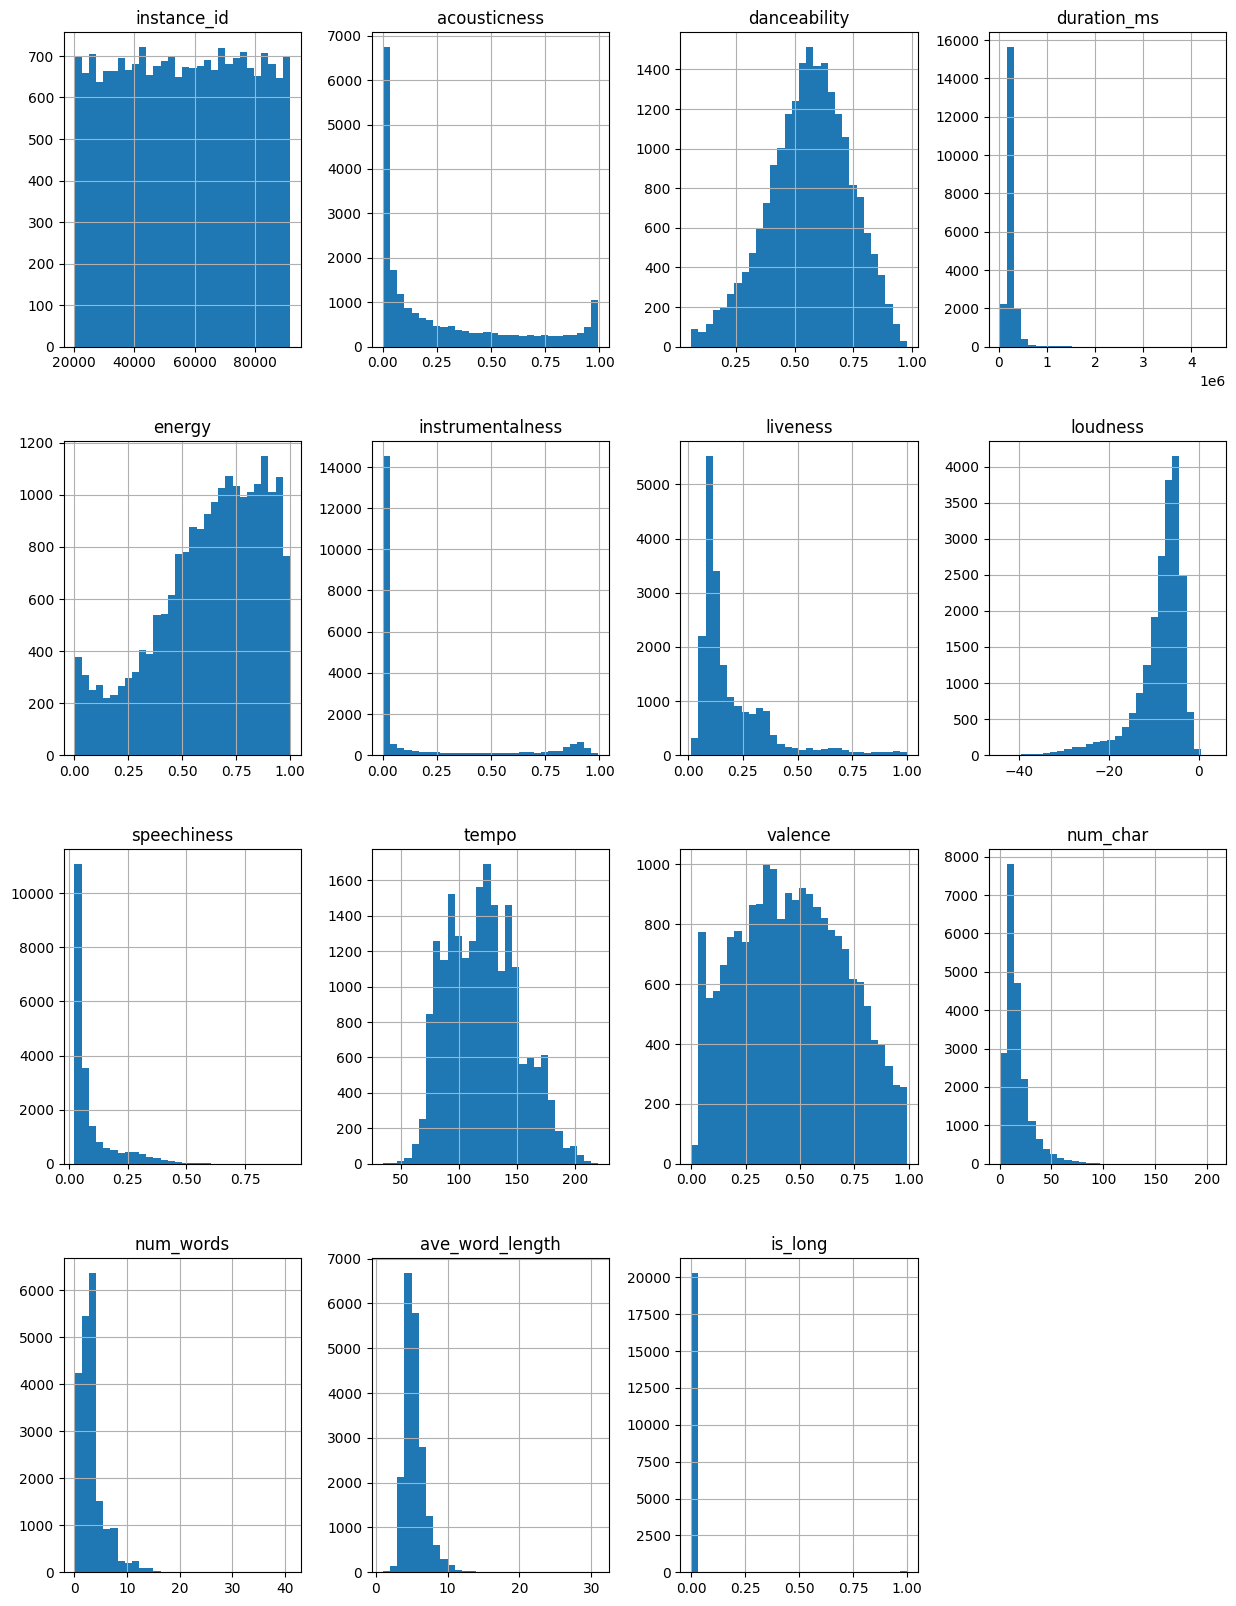

In [116]:
df.hist(figsize=(15, 20), bins=30);

In [117]:
def is_long(duration):
    if duration > 400000:
        return 1  
    else:
        return 0

In [118]:
df['is_long'] = df['duration_ms'].apply(is_long)
df_test['is_long'] = df_test['duration_ms'].apply(is_long)

In [97]:
df.head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,track_name_cleaned,num_char,num_words,ave_word_length,is_long
0,25143.0,Highwayman,0.4800,0.670,182653.0,0.351,0.017600,D,0.115,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country,highwayman,10,1,10.0,0
1,26091.0,Toes Across The Floor,0.2430,0.452,187133.0,0.670,0.000051,A,0.108,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock,toe across the floor,20,4,5.0,0
2,87888.0,First Person on Earth,0.2280,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative,first person earth,18,3,6.0,0
3,77021.0,No Te Veo - Digital Single,0.0558,0.847,255987.0,0.873,0.000003,G#,0.325,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop,no te veo digit singl,21,5,4.2,0
4,20852.0,Chasing Shadows,0.2270,0.742,195333.0,0.575,0.000002,C,0.176,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative,chase shadow,12,2,6.0,0


## Базовое заполнение пропусков

In [98]:
#заполним пропуски в обучающих данных
#заполним значения признака с -1 медианой для данного жанра
df['duration_ms'] = df['duration_ms'].replace(-1,np.NaN)
df['duration_ms'] = df['duration_ms'].replace(0,np.NaN)
df['duration_ms'] = df.groupby('music_genre',)['duration_ms'].transform(lambda x: x.fillna(x.median()))

#заполним пропуски наиболее частым значением
df['key'] = df.groupby('music_genre')['key'].transform(lambda x: x.fillna(x.value_counts().head(1).index[0]))

#заполним пропуски наиболее частым значением
df['mode'] = df.groupby('music_genre')['mode'].transform(lambda x: x.fillna(x.value_counts().head(1).index[0]))

#заполним пропуски наиболее частым значением
df['tempo'] = df.groupby('music_genre')['tempo'].transform(lambda x: x.fillna(x.mean()))

df.reset_index(drop=True, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   instance_id         20394 non-null  float64
 1   track_name          20394 non-null  object 
 2   acousticness        20394 non-null  float64
 3   danceability        20394 non-null  float64
 4   duration_ms         20394 non-null  float64
 5   energy              20394 non-null  float64
 6   instrumentalness    20394 non-null  float64
 7   key                 20394 non-null  object 
 8   liveness            20394 non-null  float64
 9   loudness            20394 non-null  float64
 10  mode                20394 non-null  object 
 11  speechiness         20394 non-null  float64
 12  tempo               20394 non-null  float64
 13  obtained_date       20394 non-null  object 
 14  valence             20394 non-null  float64
 15  music_genre         20394 non-null  object 
 16  trac

In [99]:
#заполним пропуски в тестовых данных
#заполним пропуски в столбце key случайным значениями
def get_rand_key(sample_df):
    rand_key = sample_df['key'].unique()
    random_index = random.randint(0, len(rand_key) - 1)
    return rand_key[random_index]

df_test['key'] = df_test['key'].transform(lambda x: x.fillna(get_rand_key(df_test)))

#заполним пропуски в столбце mode типичными значениями для данной группы по key
df_test['mode'] = df_test.groupby('key')['mode'].transform(lambda x: x.fillna(x.value_counts().head(1).index[0]))

#заполним пропуски в столбце tempo медианой для данной группы по key и mode
df_test['tempo'] = df_test.groupby(['key', 'mode'])['tempo'].transform(lambda x: x.fillna(x.mean()))

#заполним значения признака с -1 медианой для данного группы по key и mode
df_test['duration_ms'] = df_test['duration_ms'].replace(-1,np.NaN)
df_test['duration_ms'] = df_test['duration_ms'].replace(0,np.NaN)
df_test['duration_ms'] = df_test.groupby(['key', 'mode'])['duration_ms'].transform(lambda x: x.fillna(x.median()))

df_test.reset_index(drop=True, inplace= True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   instance_id         5099 non-null   int64  
 1   track_name          5099 non-null   object 
 2   acousticness        5099 non-null   float64
 3   danceability        5099 non-null   float64
 4   duration_ms         5099 non-null   float64
 5   energy              5099 non-null   float64
 6   instrumentalness    5099 non-null   float64
 7   key                 5099 non-null   object 
 8   liveness            5099 non-null   float64
 9   loudness            5099 non-null   float64
 10  mode                5099 non-null   object 
 11  speechiness         5099 non-null   float64
 12  tempo               5099 non-null   float64
 13  obtained_date       5099 non-null   object 
 14  valence             5099 non-null   float64
 15  music_genre         5099 non-null   object 
 16  track_

## Базовое масштабирование числовых признаков

In [100]:
#выделим в отдельный массив признаки, не значимые для обучения
features_to_drop = ['instance_id']
features_to_drop.append('obtained_date')
features_to_drop.append('track_name')
features_to_drop.append('music_genre')
features_to_drop.append('track_name_cleaned')

In [101]:
#выделим целевой признак в отдельный датафрейм и сгруппируем признаки для предсказания в другом датафрейме
features_train = df.drop(features_to_drop, axis=1)
target_train = df['music_genre']

features_test = df_test.drop(features_to_drop, axis=1)
target_test = df_test['music_genre']

In [102]:
#создадим массив столбцов, которые нужно масшабировать
pd.options.mode.chained_assignment = None
numeric = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
           'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'num_char', 'num_words', 'ave_word_length']

In [103]:
#масштабируем данные
scaler1 = MinMaxScaler(feature_range=(0, 1))
scaler1.fit(features_train[numeric])
features_train[numeric] = scaler1.transform(features_train[numeric])
features_test[numeric] = scaler1.transform(features_test[numeric])

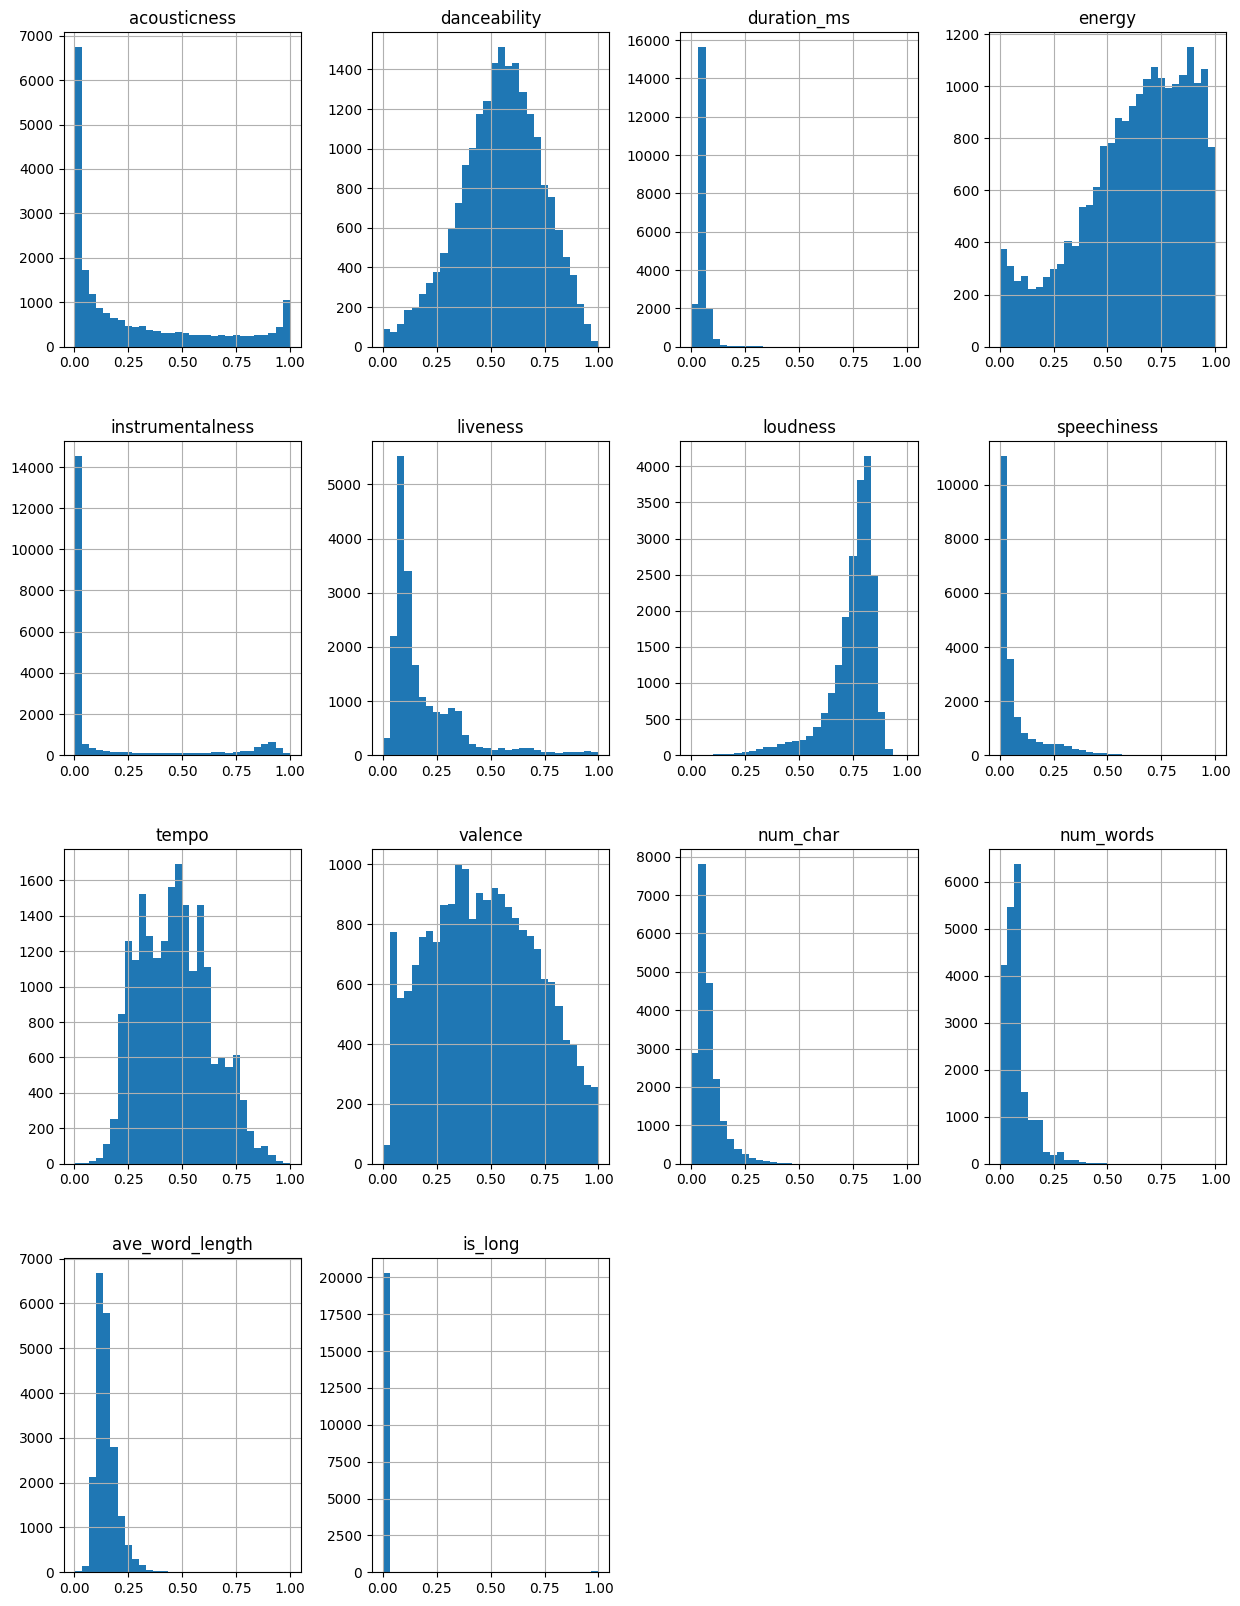

In [104]:
features_train.hist(figsize=(15, 20), bins=30);

## Генерация доп. признаков путем перемножения

In [105]:
#добавим в качестве признаков произведения столбцов между собой
columns = ['acousticness', 'danceability','energy',
       'instrumentalness', 'liveness',
       'loudness', 'speechiness',
       'valence']

for i,column_1 in enumerate(columns):
    for column_2 in columns[:i]:
        #features_train[column_1 + '/'  +column_2] = features_train[column_1]/(features_train[column_2] + 0.001)
        features_train[column_1 + '*'  +column_2] = features_train[column_1]*features_train[column_2]

for i,column_1 in enumerate(columns):
    for column_2 in columns[:i]:
        #features_train[column_1 + '/'  +column_2] = features_train[column_1]/(features_train[column_2] + 0.001)
        features_test[column_1 + '*'  +column_2] = features_test[column_1]*features_test[column_2]

## Обучение моделей

In [106]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   acousticness                   20394 non-null  float64
 1   danceability                   20394 non-null  float64
 2   duration_ms                    20394 non-null  float64
 3   energy                         20394 non-null  float64
 4   instrumentalness               20394 non-null  float64
 5   key                            20394 non-null  object 
 6   liveness                       20394 non-null  float64
 7   loudness                       20394 non-null  float64
 8   mode                           20394 non-null  object 
 9   speechiness                    20394 non-null  float64
 10  tempo                          20394 non-null  float64
 11  valence                        20394 non-null  float64
 12  num_char                       20394 non-null 

In [107]:
features_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   acousticness                   5099 non-null   float64
 1   danceability                   5099 non-null   float64
 2   duration_ms                    5099 non-null   float64
 3   energy                         5099 non-null   float64
 4   instrumentalness               5099 non-null   float64
 5   key                            5099 non-null   object 
 6   liveness                       5099 non-null   float64
 7   loudness                       5099 non-null   float64
 8   mode                           5099 non-null   object 
 9   speechiness                    5099 non-null   float64
 10  tempo                          5099 non-null   float64
 11  valence                        5099 non-null   float64
 12  num_char                       5099 non-null   f

### Подбор гиперпараметров для модели CatBoost

In [108]:
X_train, X_valid, y_train, y_valid = train_test_split(features_train, target_train, test_size=0.25, random_state=12345)

In [109]:
cat_features = ['key','mode']
#text_features = ['track_name_cleaned']

In [110]:
params = {'loss_function':'MultiClass',
          'eval_metric':'TotalF1',
          'cat_features': cat_features,
#          'text_features': text_features,
          'verbose': 100,
          'random_seed': 12345
         }
cbc = CatBoostClassifier(**params)
#cbc.fit(X_train, y_train,
#          eval_set=(X_valid, y_valid),
#         use_best_model=True,
#          plot=True
#         );

In [111]:
params = {'loss_function':'MultiClass',
          'eval_metric':'TotalF1',
          'cat_features': cat_features,
#          'text_features': text_features,
          'verbose': 100,
          'random_seed': 12345
         }
cbc = CatBoostClassifier(**params)
cbc.fit(X_train, y_train,
          eval_set=(X_valid, y_valid),
          use_best_model=True,
          plot=True
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.11403
0:	learn: 0.2889721	test: 0.2879728	best: 0.2879728 (0)	total: 141ms	remaining: 2m 20s
100:	learn: 0.5311290	test: 0.5023227	best: 0.5023227 (100)	total: 13.6s	remaining: 2m 1s
200:	learn: 0.5961794	test: 0.5229657	best: 0.5235903 (197)	total: 28.8s	remaining: 1m 54s
300:	learn: 0.6445489	test: 0.5336001	best: 0.5336001 (300)	total: 42s	remaining: 1m 37s
400:	learn: 0.6808540	test: 0.5323254	best: 0.5336856 (305)	total: 55.2s	remaining: 1m 22s
500:	learn: 0.7163965	test: 0.5320960	best: 0.5346838 (427)	total: 1m 8s	remaining: 1m 8s
600:	learn: 0.7466935	test: 0.5305093	best: 0.5346838 (427)	total: 1m 24s	remaining: 55.8s
700:	learn: 0.7784414	test: 0.5313121	best: 0.5346838 (427)	total: 1m 37s	remaining: 41.5s
800:	learn: 0.8063089	test: 0.5275788	best: 0.5346838 (427)	total: 1m 51s	remaining: 27.6s
900:	learn: 0.8316034	test: 0.5300724	best: 0.5346838 (427)	total: 2m 4s	remaining: 13.7s
999:	learn: 0.8573856	test: 0.5272712	best: 0.5346838 (427)	total: 2m 

In [112]:
cbc.get_feature_importance(prettified=True)

,Feature Id,Importances
0,duration_ms,8.116676
1,loudness,5.390852
2,danceability,4.994770
3,key,3.899689
4,loudness*danceability,3.890922
5,speechiness*danceability,3.654509
6,tempo,3.583417
7,valence,2.986947
8,energy*danceability,2.959038
9,speechiness*loudness,2.846884


In [113]:
predictions = cbc.predict(features_test)
pred_arr = pd.DataFrame(predictions, columns = ['music_genre'])
pred_arr['music_genre'].value_counts()

music_genre
Blues          924
Rap            852
Electronic     685
Alternative    677
Country        641
Anime          420
Classical      340
Rock           274
Jazz           235
Hip-Hop         51
Name: count, dtype: int64

# Выгрузка результата

In [114]:
result_df=pd.DataFrame()
result_df['instance_id'] = df_test['instance_id']
result_df['music_genre'] = pred_arr['music_genre']
result_df.to_csv('sample_submit.csv', index=False)